In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt
import pandas as pd
import seaborn as sns

In [2]:
traj_dir= '//Users/mingyu/analysis/AA_tail_rep3//'
traj = pt.iterload('*trip.nc', '*strip.parm7',stride=1)
pt.superpose(traj, ref=0)
rmsf_list=pt.rmsf(traj= traj[int(len(traj)*0.75):],mask='byres') #using last 1/4 frame of the traj rather than last 1/4 frame because apap is leaving the POX site  
print(len(rmsf_list))
print (rmsf_list)

1109
[[1.00000000e+00 3.38158213e+00]
 [2.00000000e+00 2.56822111e+00]
 [3.00000000e+00 2.03709173e+00]
 ...
 [1.10700000e+03 8.47699964e-01]
 [1.10800000e+03 5.31284274e-01]
 [1.10900000e+03 5.84590296e-01]]


In [3]:
Dimer_1=rmsf_list[1:555]
print(len(Dimer_1))
print (Dimer_1)
Dimer_2= rmsf_list[555:]
print(len(Dimer_2))
print (Dimer_2)
rmsf_stack=np.vstack((Dimer_1.T[1],Dimer_2.T[1]))
print (rmsf_stack)

554
[[  2.           2.56822111]
 [  3.           2.03709173]
 [  4.           1.5216562 ]
 ...
 [553.           0.88571977]
 [554.           0.6255667 ]
 [555.           0.66665032]]
554
[[5.56000000e+02 2.13415367e+00]
 [5.57000000e+02 1.82203242e+00]
 [5.58000000e+02 1.51135788e+00]
 ...
 [1.10700000e+03 8.47699964e-01]
 [1.10800000e+03 5.31284274e-01]
 [1.10900000e+03 5.84590296e-01]]
[[2.56822111 2.03709173 1.5216562  ... 0.88571977 0.6255667  0.66665032]
 [2.13415367 1.82203242 1.51135788 ... 0.84769996 0.53128427 0.5845903 ]]


[3.25023134e-07 6.53864446e-01 7.01403612e-01 ... 2.63344037e+00
 2.57903974e+00 2.56043477e+00]
[0.         0.72148507 0.68450461 ... 1.51819906 1.52891478 1.60201491]
6000


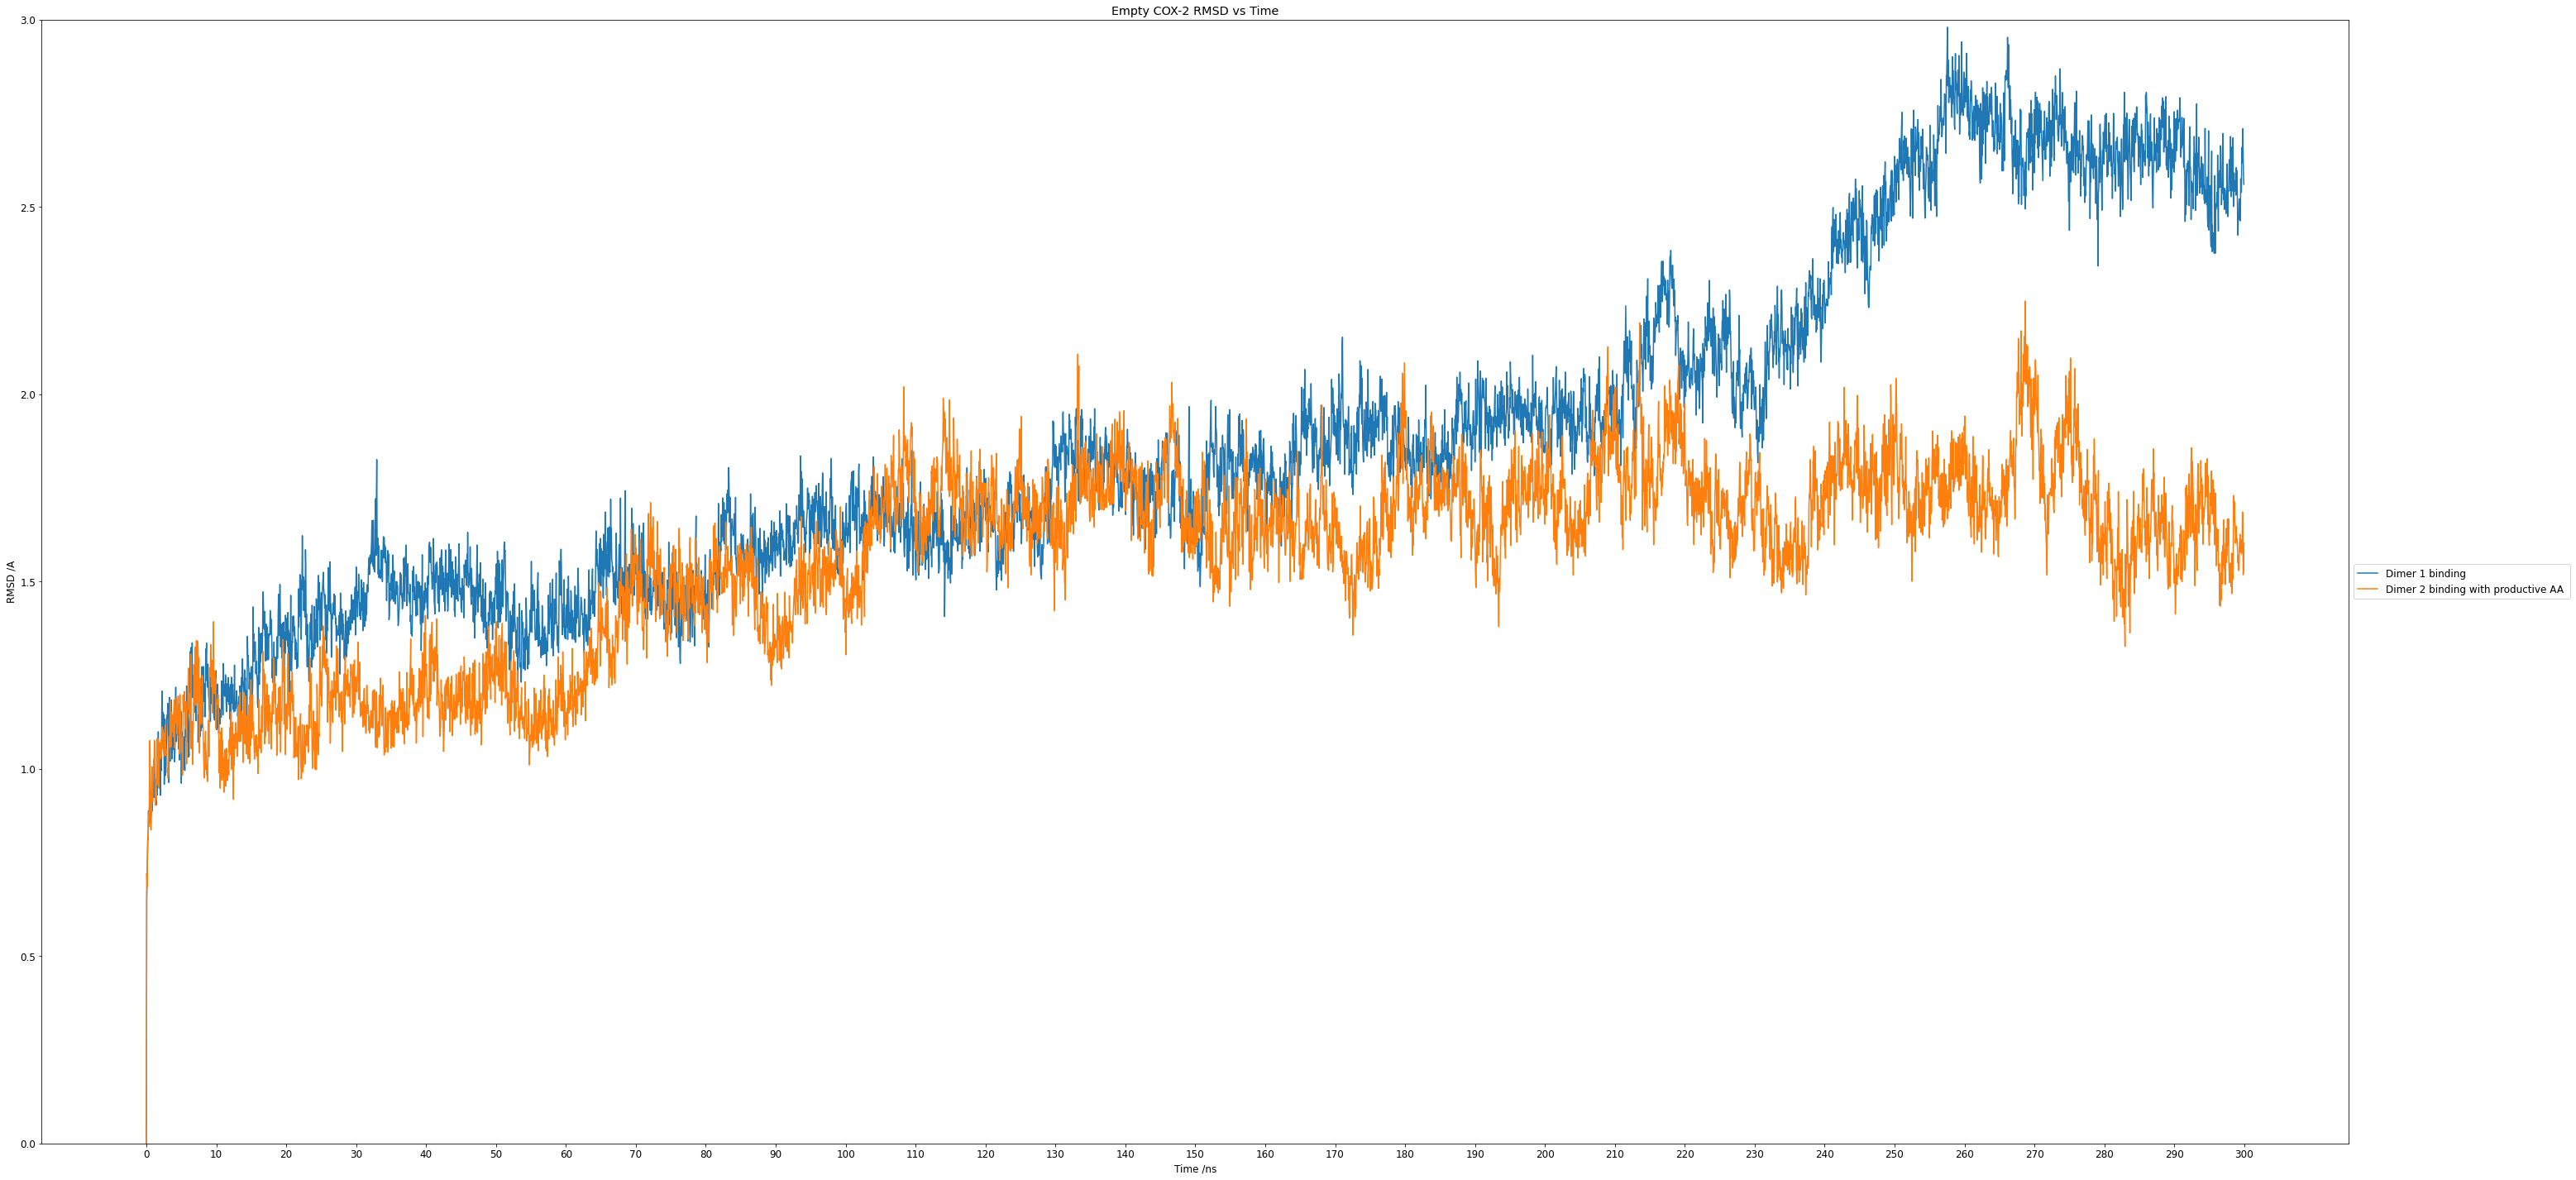

In [7]:
rmsd_traj = traj
pt.superpose(rmsd_traj, ref=0)
rmsd_dimer1 = pt.rmsd(rmsd_traj,ref=0, mask=':2-555@CA')
rmsd_dimer2 = pt.rmsd(rmsd_traj,ref=0, mask=':556-1109@CA')
print (rmsd_dimer1)
print (rmsd_dimer2)
md_time= list(np.arange(0,300,0.05))
print (len(md_time))
plt.figure(figsize = (50,25))
plt.rcParams['font.size'] = '12'
plt.plot(md_time,rmsd_dimer1,label= "Dimer 1 binding ")
plt.plot(md_time,rmsd_dimer2,label= "Dimer 2 binding with productive AA ")
plt.xticks(range(0,301,10))
plt.xlabel('Time /ns')
plt.ylabel('RMSD /A')
plt.ylim(0, 3)
plt.title('Empty COX-2 RMSD vs Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

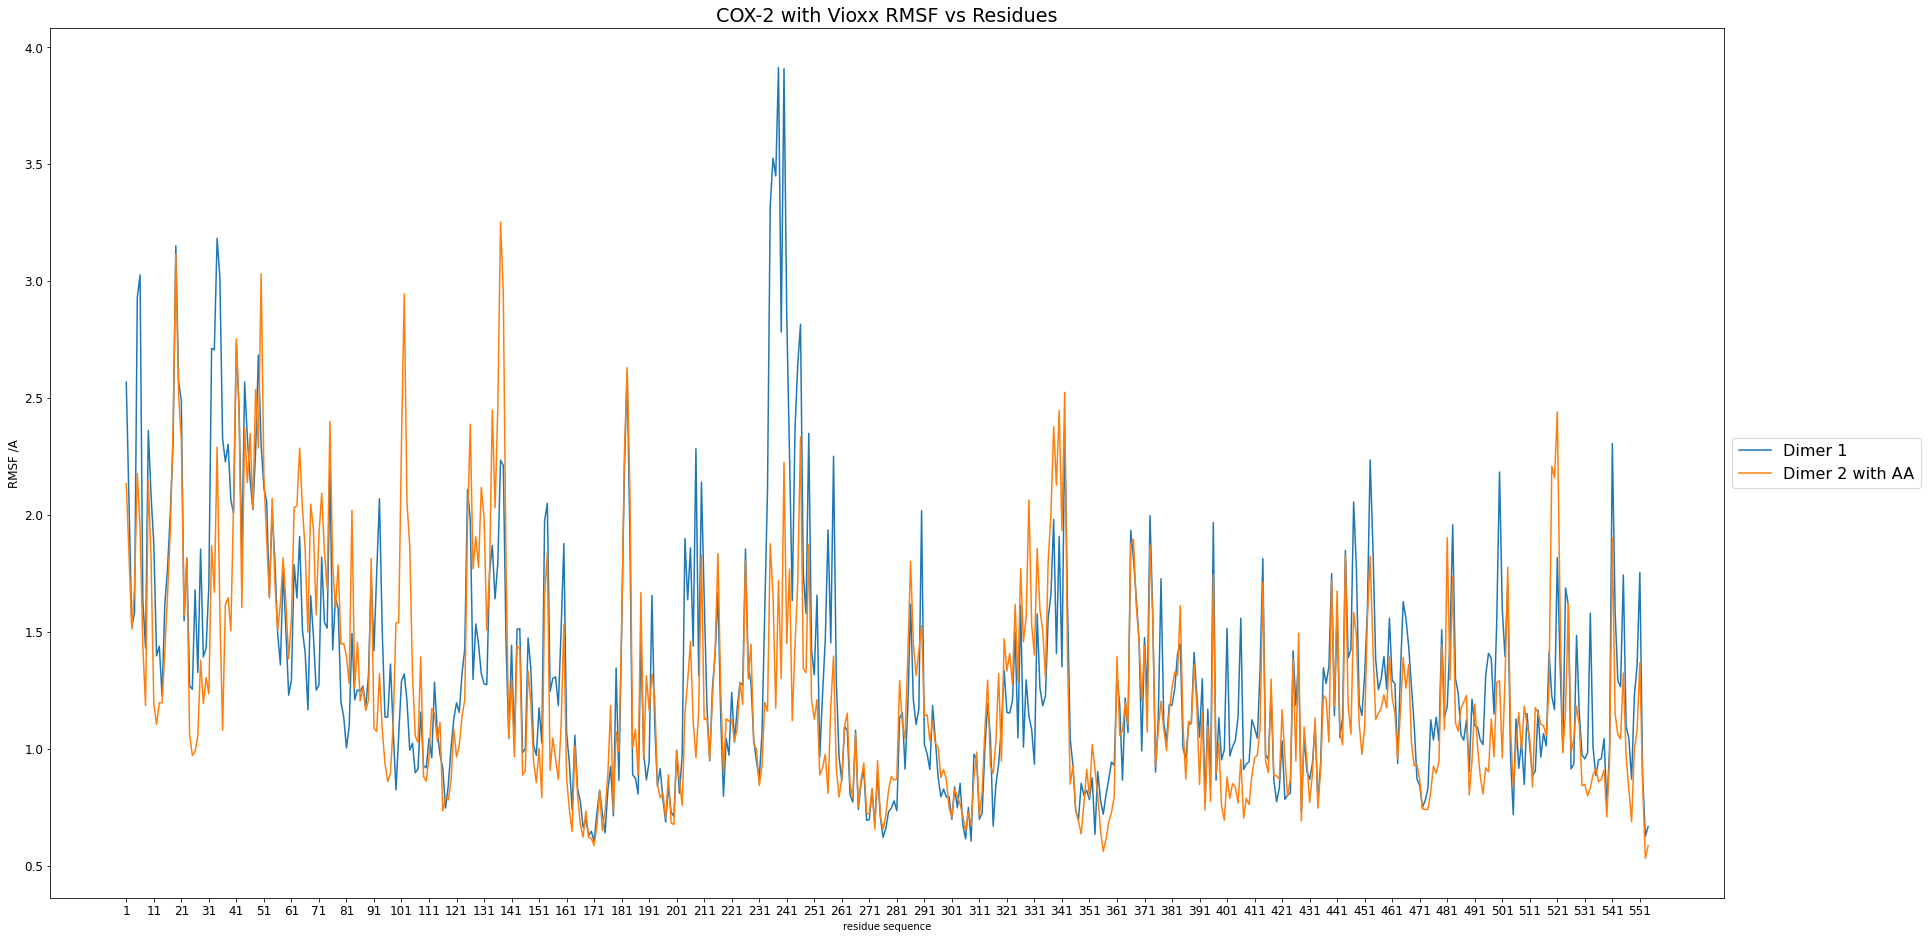

In [8]:
plt.figure(figsize = (30,16))
res_seq=np.array(range(1,555))
plt.plot(res_seq,Dimer_1.T[1],label= "Dimer 1")
plt.plot(res_seq,Dimer_2.T[1],label= "Dimer 2 with AA")
#do not visualize the head and tail residues, because they rmsf value and unlikely involves the allosteric regulation
plt.rcParams['font.size'] = '16'
plt.xticks(range(1,554,10))
plt.xlabel('residue sequence',fontdict = {'fontsize' : 10})
plt.ylabel('RMSF /A')
plt.title('COX-2 with Vioxx RMSF vs Residues')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

[  1   2   3 ... 552 553 554]
[2.56822111 2.03709173 1.5216562  ... 0.88571977 0.6255667  0.66665032]


/var/folders/j3/sp9mn2491fx004sd3ml1ttq40000gt/T/ipykernel_65219/3699622792.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[int(res)]=rmsf_stack[:,int(res)-1]
/var/folders/j3/sp9mn2491fx004sd3ml1ttq40000gt/T/ipykernel_65219/3699622792.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[int(res)]=rmsf_stack[:,int(res)-1]


Text(0.5, 19.0, 'Number of residue')

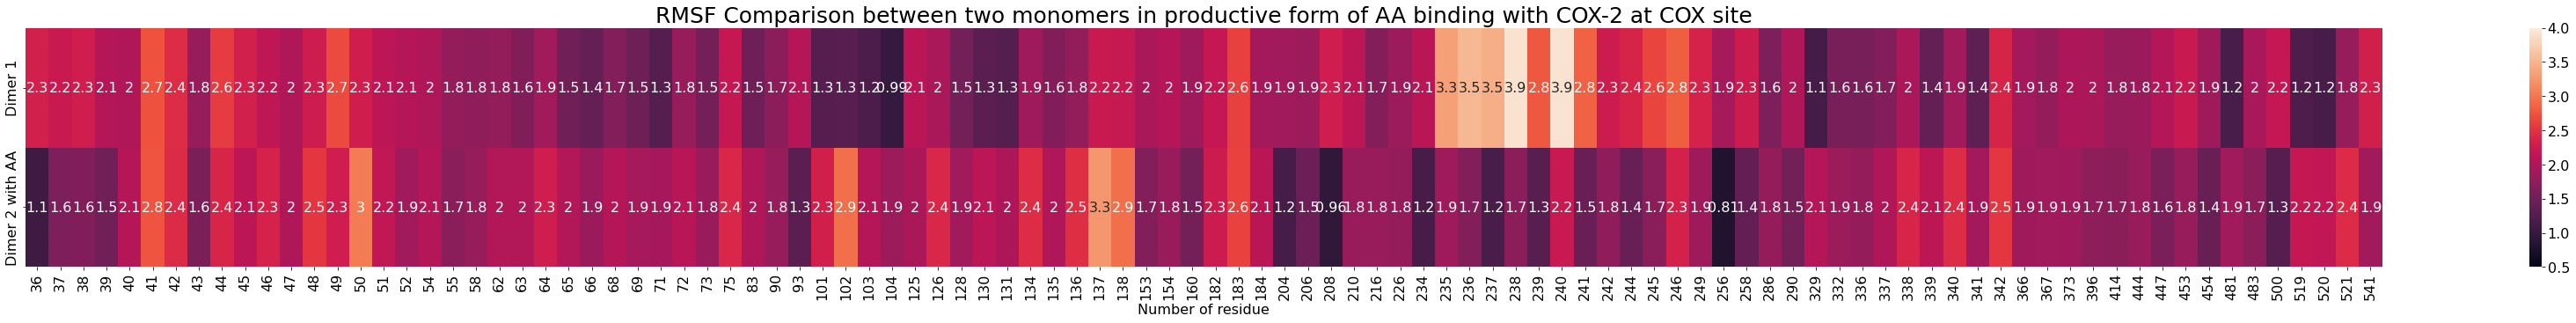

In [10]:
sub_name=['Dimer 1','Dimer 2 with AA',]
df = pd.DataFrame(index=sub_name)
res_seq=np.array(range(1,555))
print (res_seq)
#find the max value per column, per repeating subunit
max_rmsf=np.max(rmsf_stack,axis=0)
var_rmsf=np.var(rmsf_stack,axis=0)
print(max_rmsf)
df1 = df.copy()
for res in res_seq[(var_rmsf>=0)&(max_rmsf>1.8)]:
    if int(res) > 35 and int(res) < 544:
        df1[int(res)]=rmsf_stack[:,int(res)-1]
plt.figure(figsize = (60,5))
sns.heatmap(df1,annot=True,vmax=4,vmin=0.5)
plt.title('RMSF Comparison between two monomers in productive form of AA binding with COX-2 at COX site', fontdict = {'fontsize' : 25})
plt.xlabel('Number of residue')

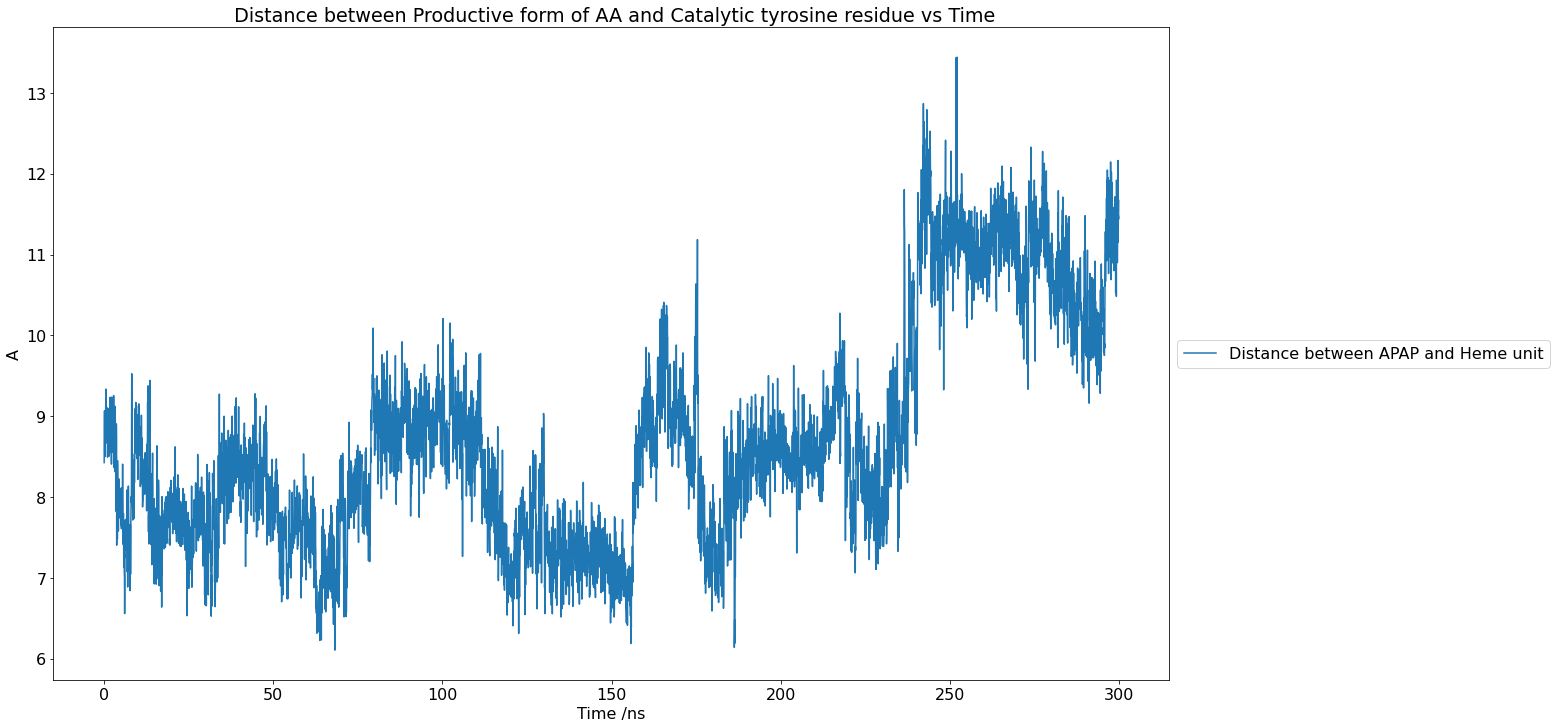

In [17]:
dist= pt.distance(traj,':1 :908')
plt.figure(figsize = (20,12))
plt.plot(md_time,dist,label= "Distance between APAP and Heme unit")

plt.xlabel('Time /ns')
plt.ylabel('A')
plt.title(' Distance between Productive form of AA and Catalytic tyrosine residue vs Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))